In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Data/argenprop_clean.csv')

df["comuna_num"]=df["comuna"].str.split(' ').str.get(1)
df["comuna_num"]=pd.to_numeric(df['comuna_num'], errors='coerce')

In [3]:
# No importa las variables de X que tome el Dummy Regressor
X = df[['sup_m2', 'lat', 'lon', 'banos', 'comuna_num', 'ambientes', 'dormitorios']]
y = df['precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Para regresión
    'max_depth': 10,                    # Profundidad del árbol
    'learning_rate': 0.1,              # Eta
    'min_child_weight': 1,
    'subsample': 0.8,                  # Fracción de muestras por árbol
    'colsample_bytree': 0.8,           # Fracción de features por árbol
    'seed': 42
}

num_rounds = 300
evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=evals,
    evals_result=evals_result,
    early_stopping_rounds=10,  # Para detener si no mejora
    verbose_eval=10            # Mostrar progreso cada 10 iteraciones
)

[0]	train-rmse:140728.23681	test-rmse:142138.63094
[10]	train-rmse:77198.53210	test-rmse:80914.13667
[20]	train-rmse:56762.89605	test-rmse:62610.31288
[30]	train-rmse:49063.43768	test-rmse:56467.00465
[40]	train-rmse:45517.27861	test-rmse:54038.34654
[50]	train-rmse:43233.96001	test-rmse:52602.40740
[60]	train-rmse:41434.81431	test-rmse:51575.41870
[70]	train-rmse:39827.53375	test-rmse:50648.79344
[80]	train-rmse:38799.89514	test-rmse:50025.87411
[90]	train-rmse:37634.96869	test-rmse:49427.02329
[100]	train-rmse:36519.15227	test-rmse:48859.40648
[110]	train-rmse:35498.91184	test-rmse:48329.29430
[120]	train-rmse:34776.67554	test-rmse:47978.59903
[130]	train-rmse:34059.67513	test-rmse:47627.97174
[140]	train-rmse:33211.67016	test-rmse:47241.88530
[150]	train-rmse:32333.73354	test-rmse:46817.11782
[160]	train-rmse:31732.93418	test-rmse:46549.35059
[170]	train-rmse:31023.10710	test-rmse:46261.09110
[180]	train-rmse:30462.30496	test-rmse:46010.59297
[190]	train-rmse:29873.97625	test-rmse:4

In [5]:
y_pred = model.predict(dtest)

In [6]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse}')

RMSE: 44108.40349404877


<Figure size 1000x600 with 0 Axes>

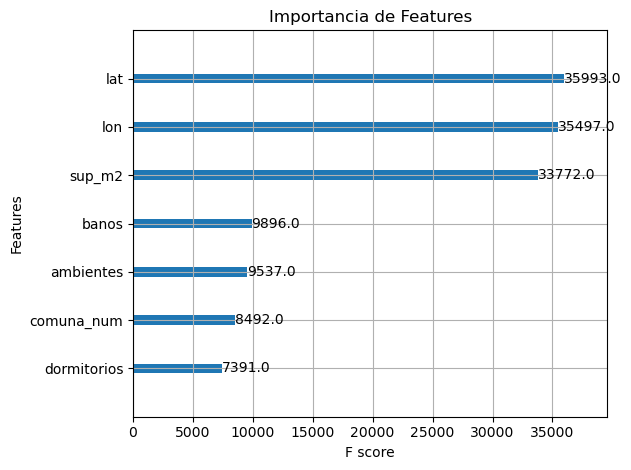

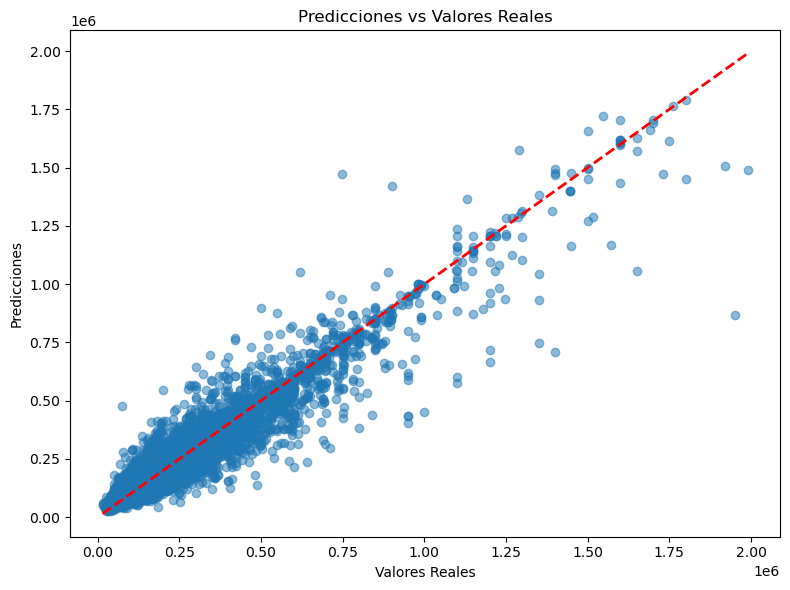

In [7]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.title('Importancia de Features')
plt.tight_layout()
plt.show()

# 8. VISUALIZAR PREDICCIONES VS REALES
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()


In [8]:
import pickle

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)